#Prepare MNIST Dataset

In [15]:
import numpy as np
import keras
import matplotlib.pyplot as plt
%matplotlib inline

In [16]:
num_classes = 10
input_shape = (28, 28, 1)

# the data, split between train and test sets
(x_train, y_train), (x_test, y_test) = keras.datasets.mnist.load_data()

# Scale images to the [0, 1] range
x_train = x_train.astype("float32") / 255 
x_test = x_test.astype("float32") / 255
# Make sure images have shape (28, 28, 1)
x_train = np.expand_dims(x_train, -1)
x_test = np.expand_dims(x_test, -1)
print("x_train shape:", x_train.shape)
print(x_train.shape[0], "train samples")
print(x_test.shape[0], "test samples")


# convert class vectors to binary class matrices
y_train = keras.utils.to_categorical(y_train, num_classes)
y_test = keras.utils.to_categorical(y_test, num_classes)

x_train shape: (60000, 28, 28, 1)
60000 train samples
10000 test samples


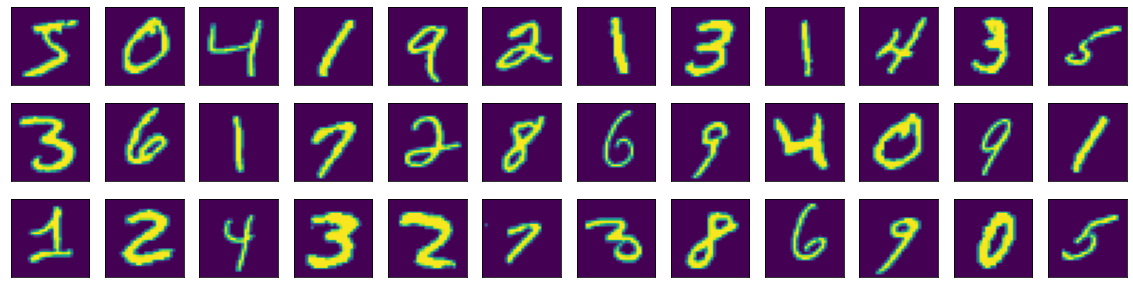

In [17]:
fig = plt.figure(figsize=(20,5))
for i in range(36):
  ax = fig.add_subplot(3, 12, i + 1, xticks=[], yticks=[])
  ax.imshow(np.squeeze(x_train[i]))

#FF MLP Model


In [18]:
from keras.models import Sequential
from keras.layers import Flatten, Dense
#Define the neural 
model = Sequential() 

#Add the Flatten Layer
model.add( Flatten(input_shape =input_shape))

#Adds 2 hidden layers with 512 nodes each. 
#Using the ReLU activation function is recommended in hidden layers.
model.add(Dense(512, activation = 'relu'))
model.add(Dense(512, activation = 'relu'))

#Adds 1 output Dense layer with 10 nodes. 
#Using the softmax activation function is recommended in the output layer for multiclass classification problems
model.add(Dense(10, activation = 'softmax'))
model.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten_2 (Flatten)          (None, 784)               0         
_________________________________________________________________
dense_4 (Dense)              (None, 512)               401920    
_________________________________________________________________
dense_5 (Dense)              (None, 512)               262656    
_________________________________________________________________
dense_6 (Dense)              (None, 10)                5130      
Total params: 669,706
Trainable params: 669,706
Non-trainable params: 0
_________________________________________________________________


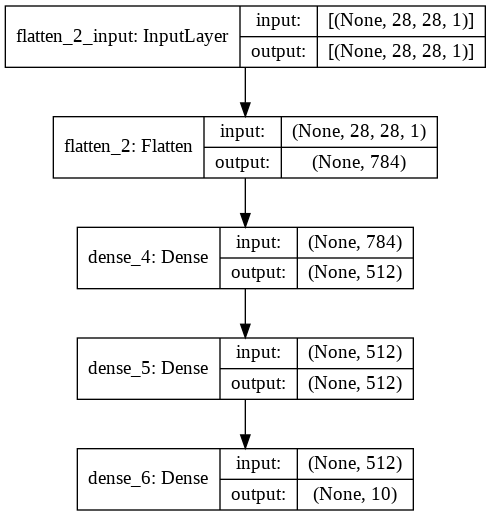

In [19]:
from keras.utils.vis_utils import plot_model
plot_model(model, to_file='model_plot.png', show_shapes=True, show_layer_names=True)

In [20]:
batch_size = 128
epochs = 15

model.compile(loss="categorical_crossentropy", optimizer="adam", metrics=["accuracy"])

model.fit(x_train, y_train, batch_size=batch_size, epochs=epochs, validation_split=0.1)

Epoch 1/15
422/422 [==============================] - 7s 16ms/step - loss: 0.4226 - accuracy: 0.8777 - val_loss: 0.1017 - val_accuracy: 0.9690
Epoch 2/15
422/422 [==============================] - 7s 16ms/step - loss: 0.0860 - accuracy: 0.9735 - val_loss: 0.0849 - val_accuracy: 0.9760
Epoch 3/15
422/422 [==============================] - 7s 17ms/step - loss: 0.0537 - accuracy: 0.9831 - val_loss: 0.0697 - val_accuracy: 0.9807
Epoch 4/15
422/422 [==============================] - 7s 16ms/step - loss: 0.0366 - accuracy: 0.9877 - val_loss: 0.0797 - val_accuracy: 0.9780
Epoch 5/15
422/422 [==============================] - 7s 16ms/step - loss: 0.0302 - accuracy: 0.9895 - val_loss: 0.0812 - val_accuracy: 0.9777
Epoch 6/15
422/422 [==============================] - 7s 16ms/step - loss: 0.0210 - accuracy: 0.9931 - val_loss: 0.0744 - val_accuracy: 0.9810
Epoch 7/15
422/422 [==============================] - 7s 16ms/step - loss: 0.0161 - accuracy: 0.9947 - val_loss: 0.0911 - val_accuracy: 0.9782

In [21]:
score = model.evaluate(x_test, y_test, verbose=0)
print('\n', 'Test accuracy:', score[1])


 Test accuracy: 0.980400025844574


#Second model (CNN)

In [8]:
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
# Builds the model object
model = Sequential() 

#Add a convolutional layer with ReLU activation and depth = 16 kernels
model.add(Conv2D(filters=16,kernel_size=2,padding='same',activation='relu',input_shape=input_shape)) 

#POOL_1: downsamples the image to choose the best features
model.add(MaxPooling2D(pool_size=2))

model.add(Conv2D(filters=32,kernel_size=2,padding='same',activation='relu'))
model.add(MaxPooling2D(pool_size=2))
model.add(Conv2D(filters=64,kernel_size=2,padding='same',activation='relu'))
model.add(MaxPooling2D(pool_size=2))

#Dropout layer to avoid overfitting with a 30% rate
model.add(Dropout(0.3)) 

#Flatten the last feature map into a vector of features
model.add(Flatten())

#Add the first fully connected layer
model.add(Dense(500,activation='relu'))
model.add(Dropout(0.4))

#The output layer is a fully connected layer with 10 nodes and softmax activation to
#give probabilities to the 10 classes.
model.add(Dense(10,activation='softmax'))
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_3 (Conv2D)            (None, 28, 28, 16)        80        
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 14, 14, 16)        0         
_________________________________________________________________
conv2d_4 (Conv2D)            (None, 14, 14, 32)        2080      
_________________________________________________________________
max_pooling2d_4 (MaxPooling2 (None, 7, 7, 32)          0         
_________________________________________________________________
conv2d_5 (Conv2D)            (None, 7, 7, 64)          8256      
_________________________________________________________________
max_pooling2d_5 (MaxPooling2 (None, 3, 3, 64)          0         
_________________________________________________________________
dropout_2 (Dropout)          (None, 3, 3, 64)         

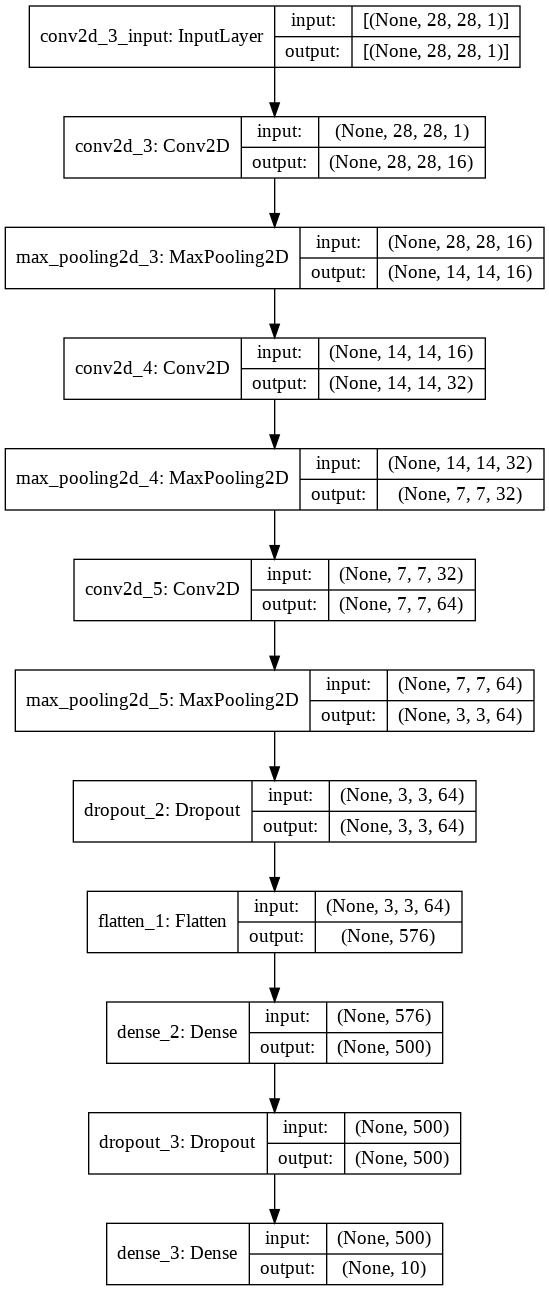

In [14]:
from keras.utils.vis_utils import plot_model
plot_model(model, to_file='model_plot.png', show_shapes=True, show_layer_names=True)

Compile and Train the Model

In [9]:
batch_size = 128
epochs = 15

model.compile(loss="categorical_crossentropy", optimizer="adam", metrics=["accuracy"])

model.fit(x_train, y_train, batch_size=batch_size, epochs=epochs, validation_split=0.1)

Epoch 1/15
422/422 [==============================] - 31s 72ms/step - loss: 0.8281 - accuracy: 0.7240 - val_loss: 0.0722 - val_accuracy: 0.9772
Epoch 2/15
422/422 [==============================] - 30s 71ms/step - loss: 0.1214 - accuracy: 0.9600 - val_loss: 0.0591 - val_accuracy: 0.9823
Epoch 3/15
422/422 [==============================] - 30s 70ms/step - loss: 0.0879 - accuracy: 0.9722 - val_loss: 0.0438 - val_accuracy: 0.9875
Epoch 4/15
422/422 [==============================] - 31s 74ms/step - loss: 0.0687 - accuracy: 0.9787 - val_loss: 0.0382 - val_accuracy: 0.9887
Epoch 5/15
422/422 [==============================] - 31s 73ms/step - loss: 0.0574 - accuracy: 0.9807 - val_loss: 0.0321 - val_accuracy: 0.9902
Epoch 6/15
422/422 [==============================] - 31s 73ms/step - loss: 0.0490 - accuracy: 0.9842 - val_loss: 0.0348 - val_accuracy: 0.9898
Epoch 7/15
422/422 [==============================] - 31s 72ms/step - loss: 0.0425 - accuracy: 0.9856 - val_loss: 0.0284 - val_accuracy:

Evaluate the model

In [11]:
score = model.evaluate(x_test, y_test, verbose=0)
print('\n', 'Test accuracy:', score[1])


 Test accuracy: 0.9909999966621399


#MLPs vs. CNNs
We get pretty good results
(close to 98% accuracy compared to 99% with CNNs). But MLPs and CNNs do not
usually yield comparable results. The MNIST dataset is special because it is very
clean and perfectly preprocessed. For example, all images have the same size and
are centered in a 28 × 28 pixel grid. Also, the MNIST dataset contains only grayscale
images. It would be a much harder task if the images had color or the digits were
skewed or not centered.